In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tables import *
import h5py
import os
from os.path import isfile, join
import pandas as pd
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import statistics
# from fast_histogram import histogram1d, histogram2d
from scipy import stats
import math
from fast_histogram import histogram1d
from sklearn.cluster import AgglomerativeClustering
from tqdm import tqdm
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels



### Visualiaztion of tract data:
reading the files and listing the key of each file (E,F_tract, s_tract) and then plotting the data, frequency against time.

In [3]:
####reading the files for tracts
#https://realpython.com/working-with-files-in-python/
##https://docs.h5py.org/en/2.3/high/file.html
Tlist = (r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31')
for newlist in os.listdir(Tlist):
    print(newlist)
    #https://stackoverflow.com/questions/28170623/how-to-read-hdf5-files-in-python
    with h5py.File(newlist, 'r') as f:
    # List all groups
        print("Tract Labels: %s" % f.keys())
        a_group_key = list(f.keys())[0]

1-100032-A-0.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-100038-A-14.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-100210-A-36.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-100210-B-36.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-101296-A-19.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-101296-B-19.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-101336-A-30.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-101404-A-34.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-103298-A-9.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-103995-A-30.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-103999-A-30.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-104089-A-22.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-104089-B-22.wav.

Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-39835-A-9.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-39835-B-9.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-39901-A-11.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-39901-B-11.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-39923-A-1.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-39937-A-28.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-40154-A-46.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-40621-A-28.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-40730-A-1.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-40967-A-28.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-41615-A-34.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-4211-A-12.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E',

Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-94036-A-22.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-94231-A-32.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-94231-B-32.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-95563-A-31.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-96890-A-37.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-96950-A-9.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-96950-B-9.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-97392-A-0.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-977-A-39.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-97793-A-31.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-9841-A-13.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
1-9886-A-49.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', '

Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-146877-A-31.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-146877-B-31.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-151079-A-20.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-152895-A-31.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-152964-A-31.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-153388-A-31.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-154688-A-31.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-155801-A-11.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-157488-A-6.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-158746-A-2.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-158746-B-2.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-158746-C-2.wav.1.hdf5
Tract Labels: <KeysV

Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-81270-A-1.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-81731-A-10.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-81970-A-7.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-81970-B-7.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-81970-C-7.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-82071-A-27.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-82077-A-7.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-82274-A-5.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-82274-B-5.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-82367-A-10.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-82455-A-23.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
2-82538-A-21.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', '

Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-134699-A-16.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-134699-B-16.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-134699-C-16.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-134802-A-13.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-135469-A-35.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-135650-A-45.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-135650-B-45.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-136288-A-0.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-136451-A-45.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-136608-A-16.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-137152-A-1.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-138114-A-22.wav.1.hdf5
Tract Labels: <Key

Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-172179-A-31.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-172881-A-48.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-172922-A-48.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-174840-A-43.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-174866-A-29.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-177082-A-22.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-177083-A-22.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-178096-A-6.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-180147-A-30.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-180256-A-0.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-180977-A-0.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
3-181132-A-14.wav.1.hdf5
Tract Labels: <Keys

Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-161100-A-47.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-161103-A-47.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-161105-A-47.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-161105-B-47.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-161127-A-10.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-161303-A-5.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-161303-B-5.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-161519-A-19.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-161579-A-40.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-161579-B-40.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-163264-A-10.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-163606-A-16.wav.1.hdf5
Tract Labels: <Key

Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-193480-B-40.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-194246-A-13.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-194680-A-36.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-194711-A-38.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-194754-A-0.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-194808-A-29.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-194979-A-25.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-194981-A-25.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-195305-A-31.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-195451-A-44.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-195497-A-11.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
4-195497-B-11.wav.1.hdf5
Tract Labels: <Ke

Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-182010-A-36.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-182012-A-36.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-182404-A-18.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-184323-A-42.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-184871-A-24.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-185516-A-27.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-185579-A-41.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-185579-B-41.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-185908-A-18.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-186924-A-12.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-187201-A-4.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-187201-B-4.wav.1.hdf5
Tract Labels: <Key

Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-219379-B-11.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-219379-C-11.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-220026-A-21.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-220027-A-21.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-220939-A-27.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-220955-A-40.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-221518-A-21.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-221528-A-39.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-221529-A-39.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-221567-A-22.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-221568-A-22.wav.1.hdf5
Tract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
5-221593-A-21.wav.1.hdf5
Tract Labels: <K

### Visual Representation of raw data
energy plots, frequency against time

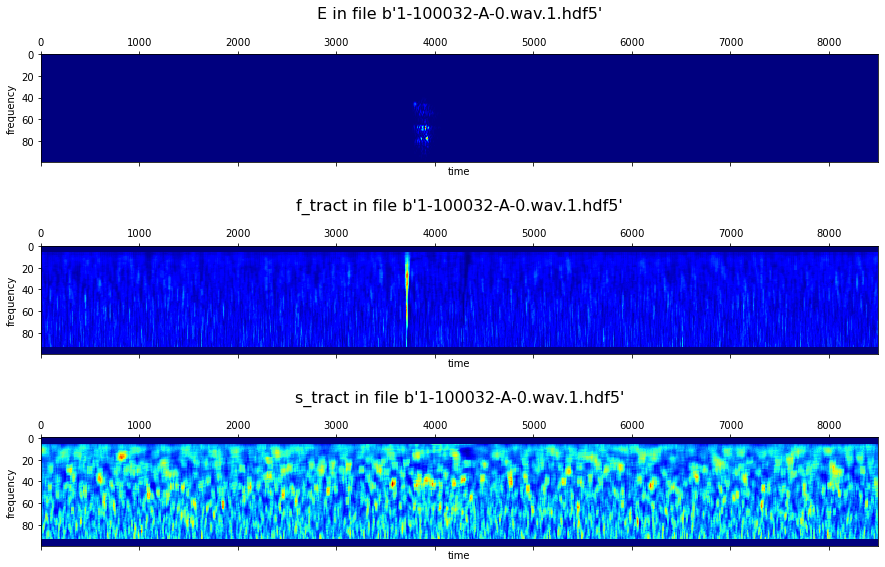

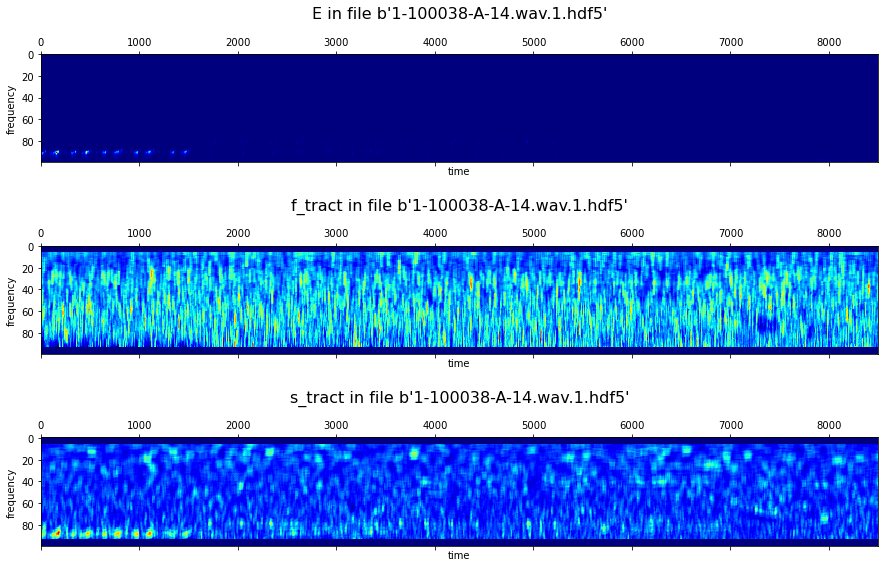

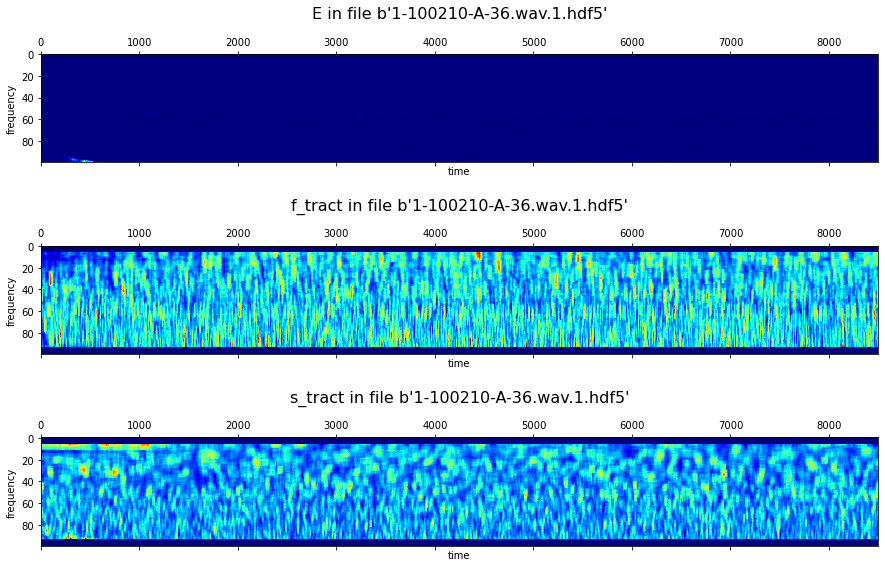

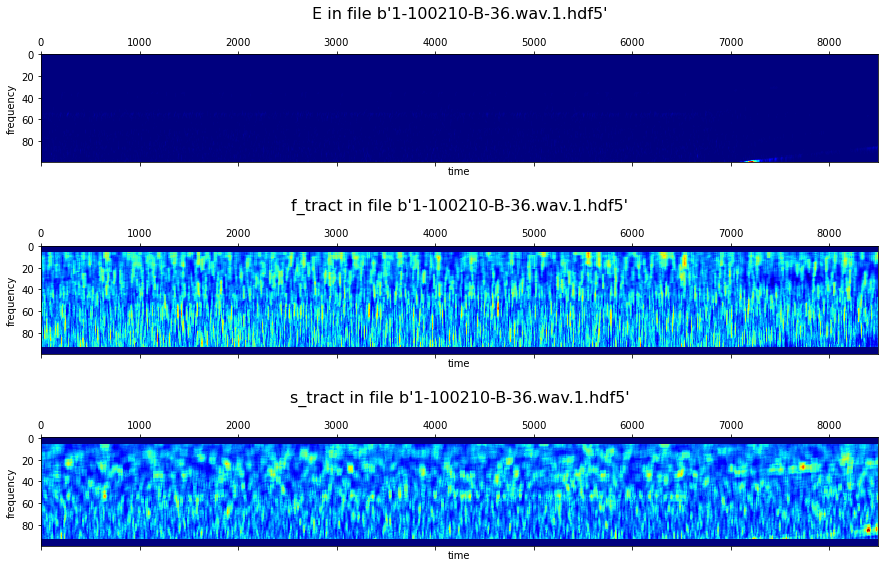

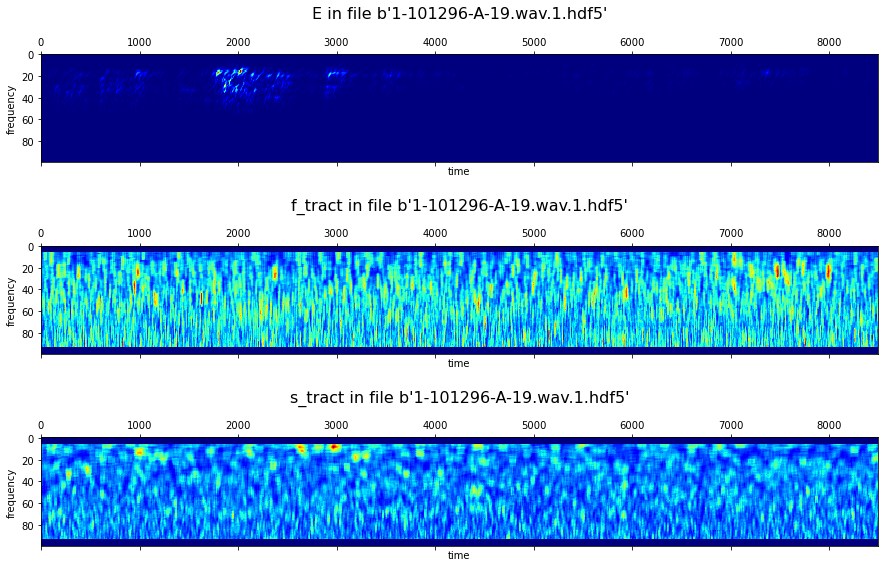

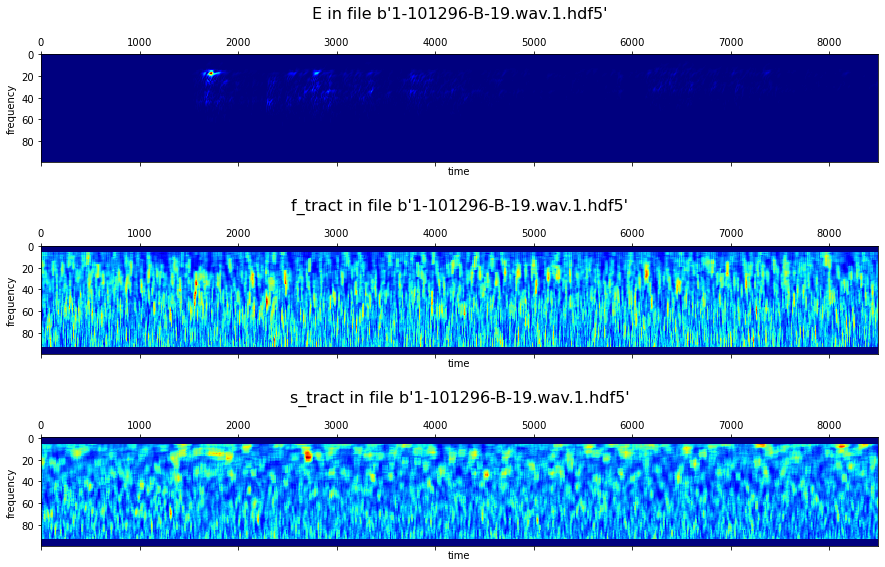

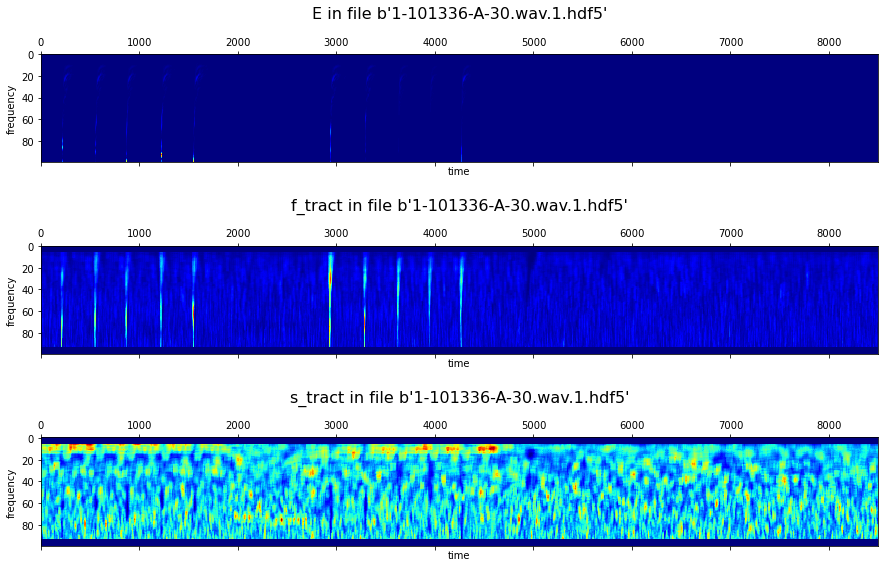

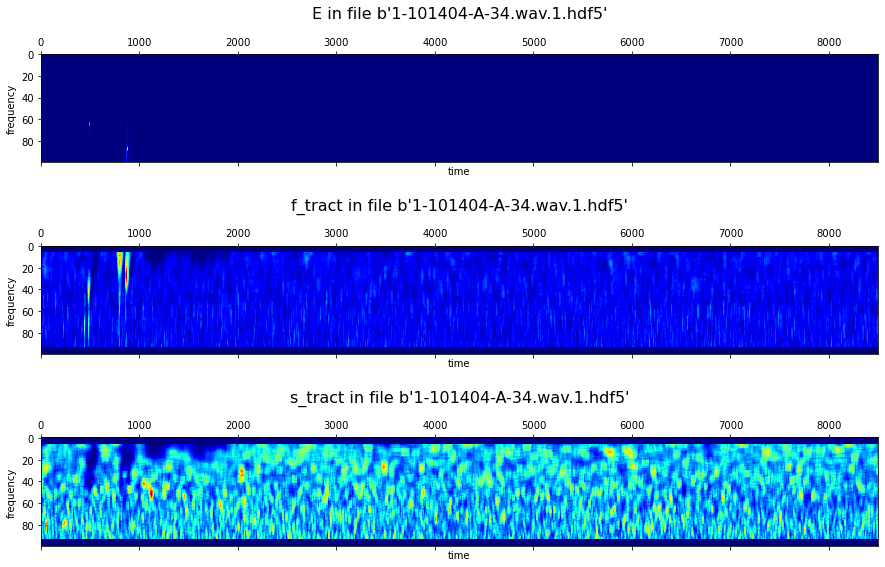

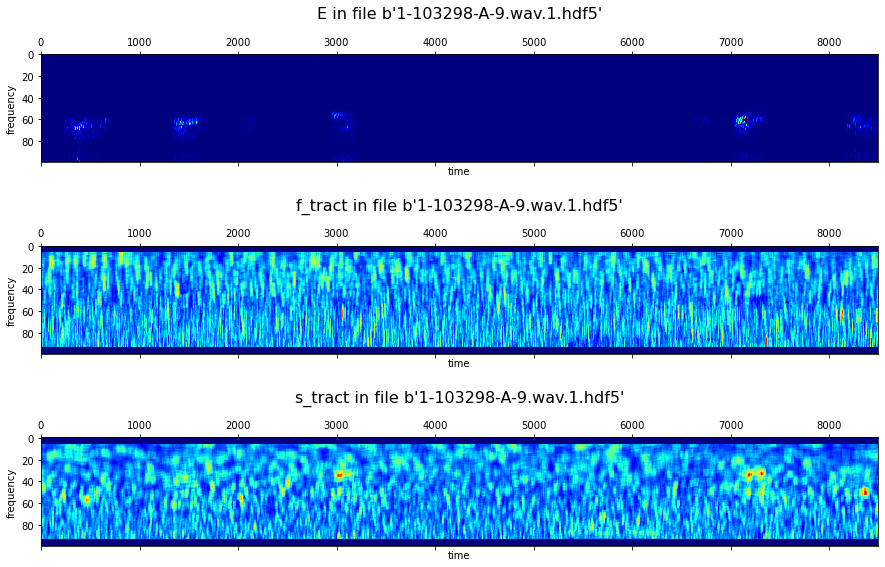

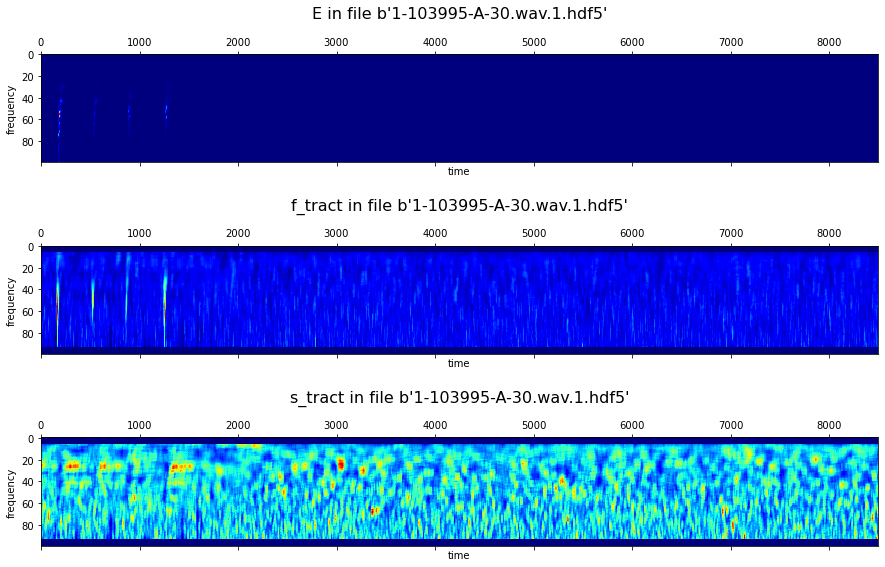

In [4]:
tractfile = os.fsencode(r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31')
aspec = 11.00
font = {'size': 16}
pad=30
count = 0
for newfile in os.listdir(tractfile):
    fpath = os.path.join(tractfile, newfile)
    hfile = h5py.File(fpath,"r") #open the file for reading
    tract1 =hfile["E"]
    tract2 = hfile["f_tract"]
    tract3 = hfile["s_tract"]
    fig, ax = plt.subplots(3, 1, figsize=(15,10))
    ax[0].set_title('E in file '+format(newfile), fontdict=font,pad=pad)
    ax[0].matshow(tract1, interpolation='nearest', cmap=cm.jet), ax[0].set_xlabel('time'),ax[0].set_ylabel('frequency')
    ax[0].set_aspect(aspec)
    ax[1].set_title('f_tract in file '+format(newfile), fontdict=font,pad=pad)
    ax[1].matshow(tract2, interpolation='nearest', cmap=cm.jet), ax[1].set_xlabel('time'),ax[1].set_ylabel('frequency')
    ax[1].set_aspect(aspec)
    ax[2].set_title('s_tract in file '+format(newfile), fontdict=font,pad=pad)
    ax[2].matshow(tract3, interpolation='nearest', cmap=cm.jet), ax[2].set_xlabel('time'),ax[2].set_ylabel('frequency')
    ax[2].set_aspect(aspec)

    #run 10 
    count += 1
    plt.show()
    if (count >= 10):
        break

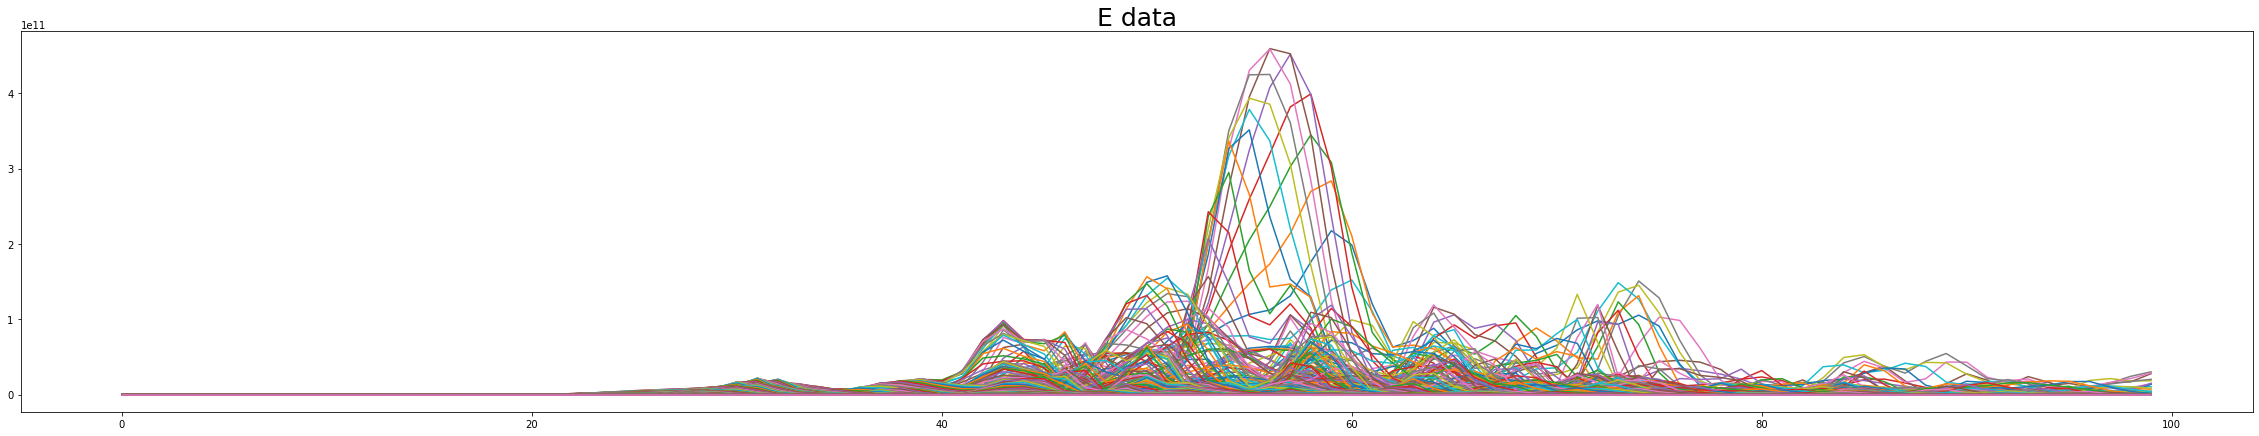

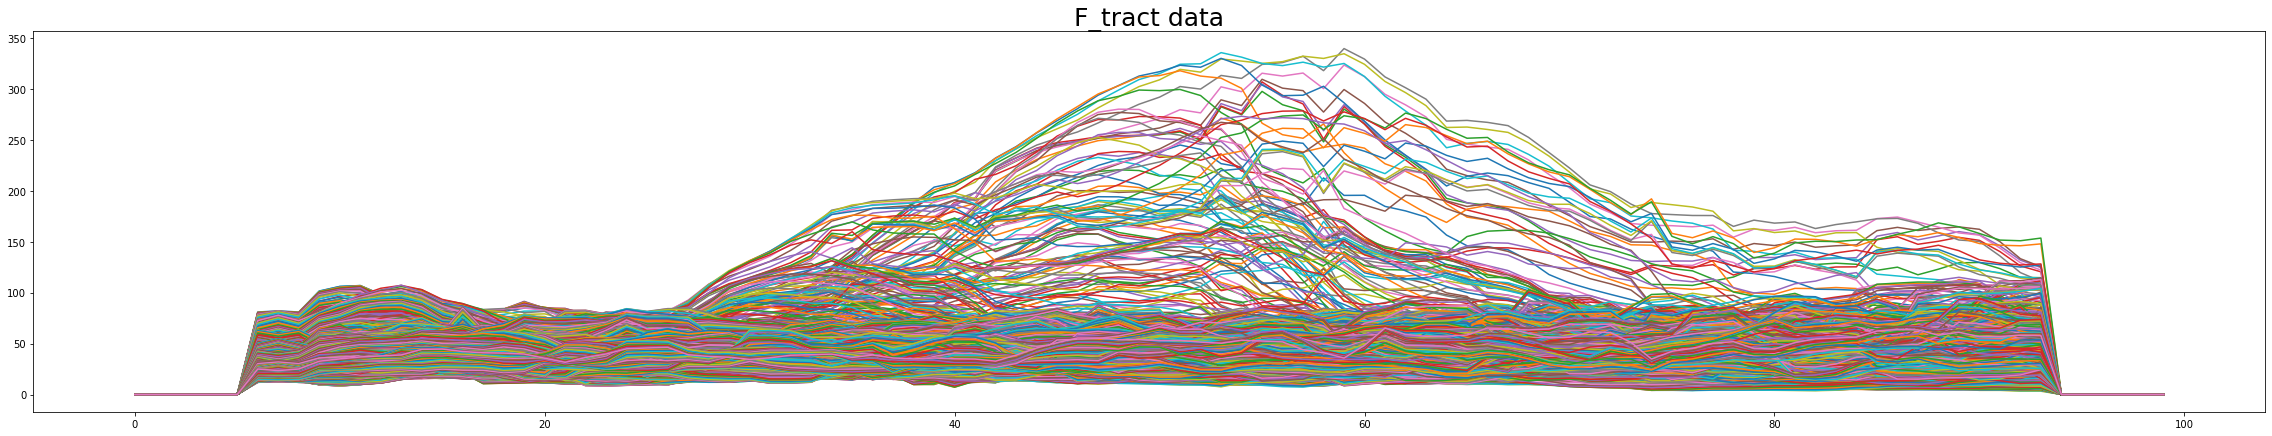

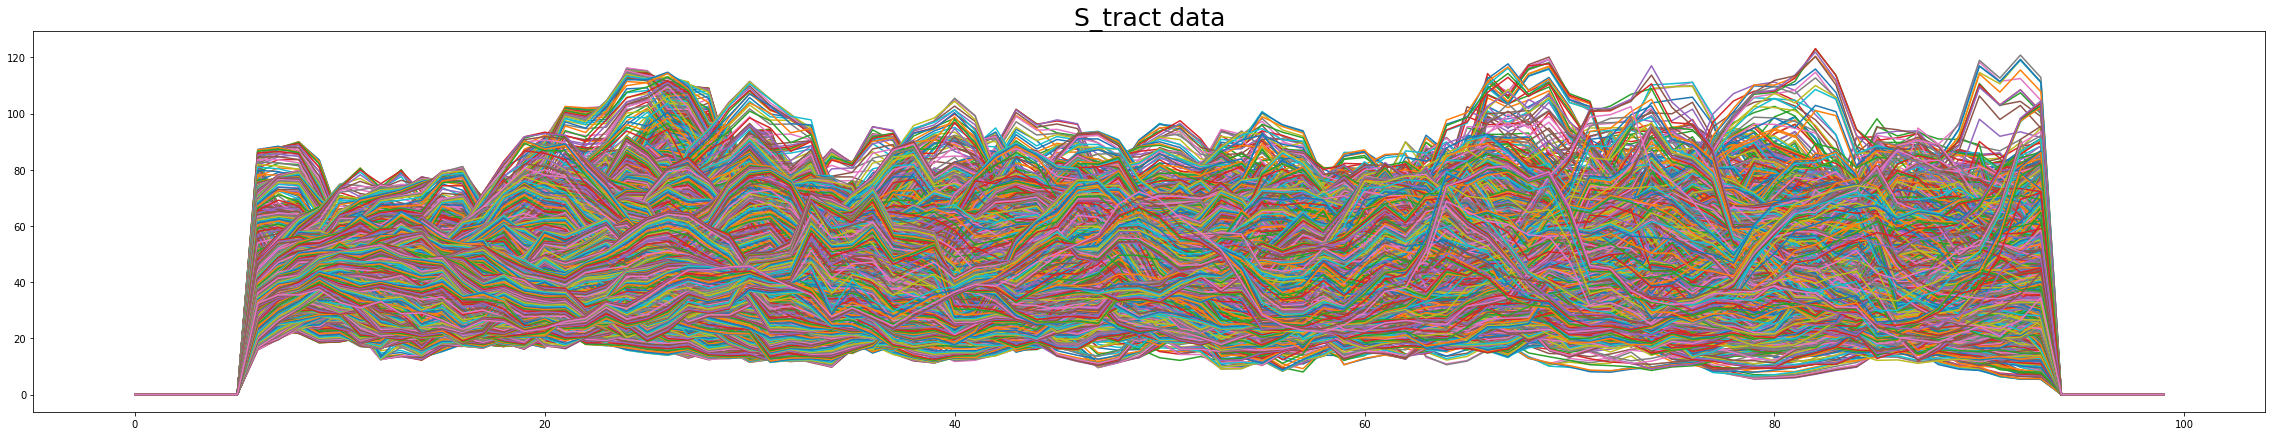

In [5]:
plt.figure(figsize=(40, 7))
plt.title('E data', size=25)
plt.plot(tract1)

plt.figure(figsize=(40, 7))
plt.title('F_tract data', size=25)
plt.plot(tract2)

plt.figure(figsize=(40, 7))
plt.title('S_tract data', size=25)
plt.plot(tract3)

fig.tight_layout()
plt.show()

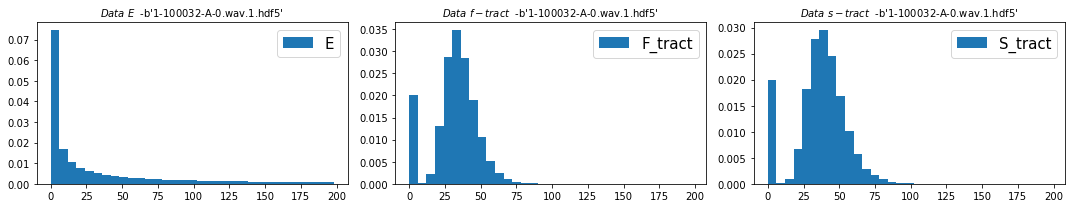

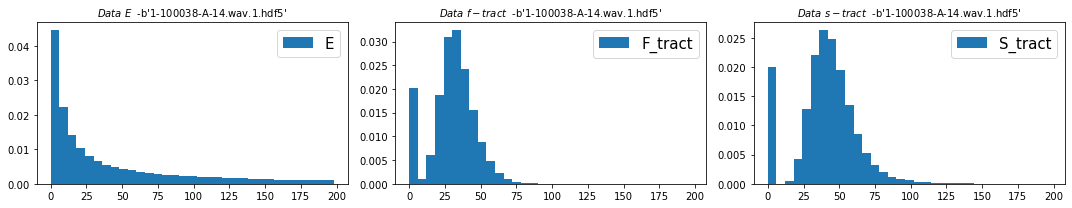

C:\Users\31647\Anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


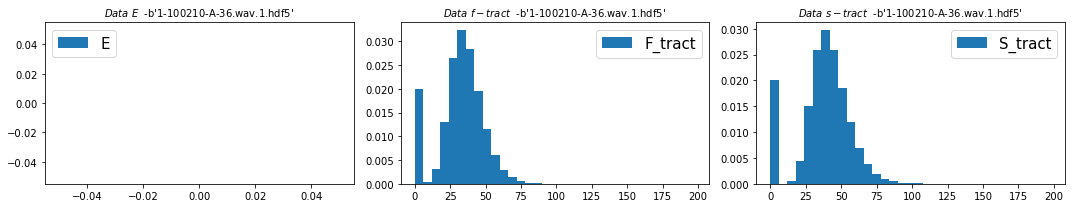

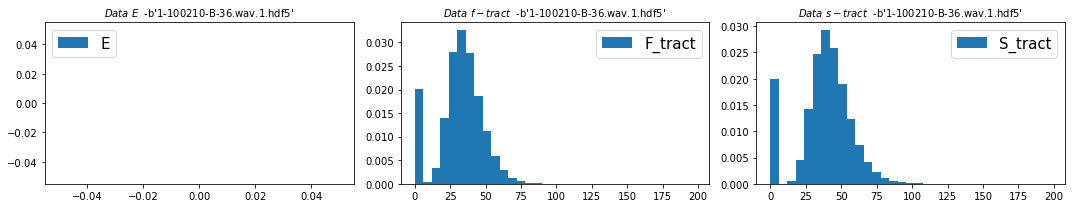

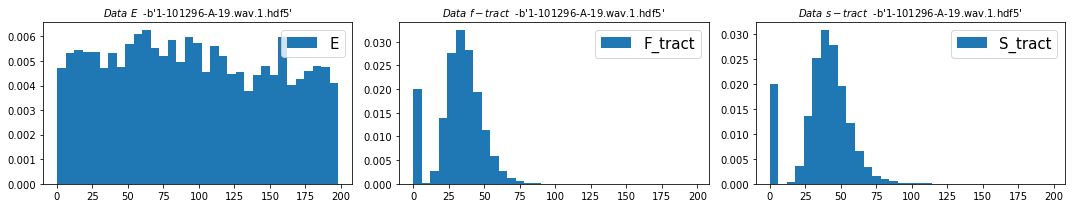

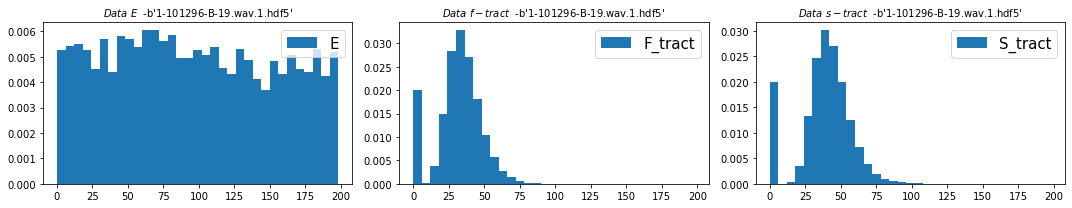

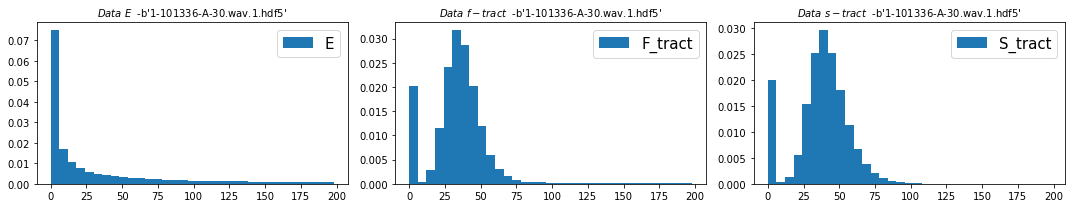

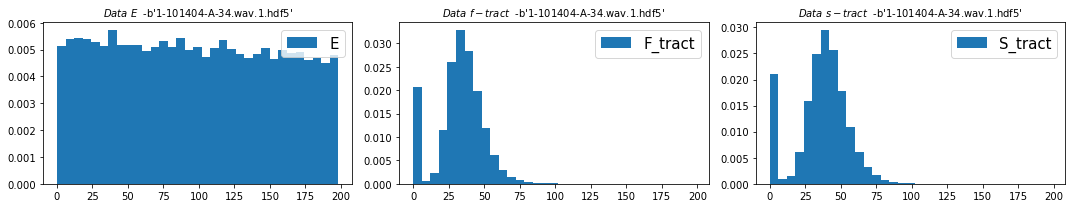

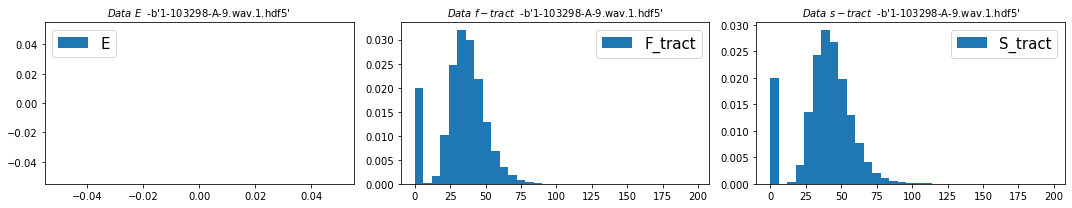

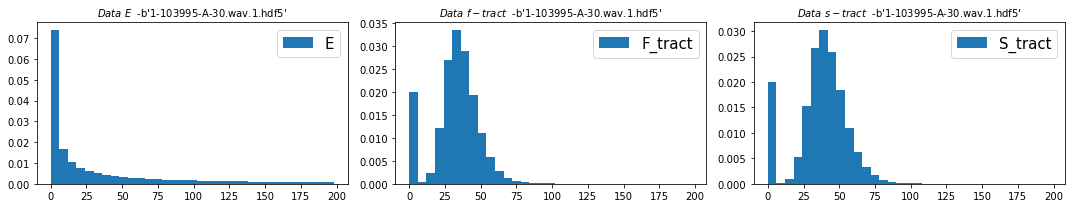

In [6]:
tractfile = os.fsencode(r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31')
count = 0 
#call and plot the data
for newfile in os.listdir(tractfile):
    fpath = os.path.join(tractfile, newfile)
    hfile = h5py.File(fpath,"r") #open the file for reading
    tract1 =hfile["E"]
    tract2 = hfile["f_tract"]
    tract3 = hfile["s_tract"]
    bines = np.arange(0, 200, 6)
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    # ploting histograms
    ax[0].set_title('$Data\ E$  -' + format(newfile), size=10)
    ax[0].hist(np.array(tract1).flatten(), bins=bines, density=True, label='E')
    ax[0].legend(fontsize=15)

    ax[1].set_title('$Data\ f-tract$  -' + format(newfile), size=10)
    ax[1].hist(np.array(tract2).flatten(),
               bins=bines,
               density=True,
               label='F_tract')
    ax[1].legend(fontsize=15)

    ax[2].set_title('$Data\ s-tract$  -' + format(newfile), size=10)
    ax[2].hist(np.array(tract3).flatten(),
               bins=bines,
               density=True,
               label='S_tract')
    ax[2].legend(fontsize=15)

    plt.tight_layout()
    plt.show()
    
    count+=1
    if(count>=10):
        break

 ### Constructing feature set
 1. create an algorith with features that will define the characteristics 

2. frequency of the classes in the esc-50 file as precise as possible.

3. The f-tract,s-tract and E files will be sliced into arrays leaving the rows of zeros.

4. create histogram with frequency limits

In [9]:
tractfile = r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31'
fn = [
    f for f in os.listdir(tractfile)
    if isfile(join(tractfile, f)) and not f.startswith('.')
]

print('lenght of labels in tract folder:', len(fn), '\n')

lenght of labels in tract folder: 2000 



In [10]:
#printing the csv file
metadata_file = join('ESC-50-master/meta','esc50.csv')
df = pd.read_csv(metadata_file)
df

filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
1     1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2     1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3     1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4     1-101296-A-19.wav     1      19    thunderstorm  False    101296    A
...                 ...   ...     ...             ...    ...       ...  ...
1995   5-263831-B-6.wav     5       6             hen  False    263831    B
1996  5-263902-A-36.wav     5      36  vacuum_cleaner  False    263902    A
1997   5-51149-A-25.wav     5      25       footsteps  False     51149    A
1998    5-61635-A-8.wav     5       8           sheep  False     61635    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

[2000 rows x 7 columns]

In [11]:
path = (r"C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31/")

file_chirpingBirds = list(df["filename"])

cols = ["filename","f_tract","s_tract","E"]
df_tract = pd.DataFrame(columns= cols )

count=0 # to set number of files i will print
for index, file in enumerate(file_chirpingBirds):

    file_ =  path + file + ".1.hdf5"
#     print(file_)
    with h5py.File(file_, "r") as f:
        f_tract = list(f['f_tract'])
        s_tract = list(f['s_tract'])
        E = list(f['E'])
# join the tract keys to their filenames of the chiping bird files from csv.
        df_tract.loc[index, cols] = [file, f_tract,s_tract,E]
# df_tract
        print("Keys without the zeros")
        print("\n FTract arrays: \n", np.array(f_tract))
        print("\n STract arrays: \n", np.array(s_tract))
        print("\n E arrays:\n", np.array(E))
        count += 1
        if (count >=1):
            break

Keys without the zeros

 FTract arrays: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 STract arrays: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 E arrays:
 [[2.9520156e+00 2.9593060e+00 2.9698939e+00 ... 3.6246188e+00
  3.5982349e+00 3.5674953e+00]
 [2.3004091e+00 2.3617568e+00 2.4270308e+00 ... 2.4048607e+00
  2.3026240e+00 2.1967525e+00]
 [2.3619943e+00 2.4441607e+00 2.5170984e+00 ... 1.0077218e+00
  9.4669753e-01 8.9200687e-01]
 ...
 [1.2481842e+02 2.5220947e+02 3.2148627e+02 ... 6.6443970e+02
  1.2722723e+03 1.1371731e+03]
 [5.7515344e+02 6.8749316e+02 9.2804034e+02 ... 1.3130325e+03
  1.2335647e+03 5.7184857e+02]
 [6.8819647e+02 6.7611835e+02 7.0990930e+02 ... 7.6699377e+02
  6.1999591e+02 2.4449316e+02]]


-----------------------Next step will be to plot the histograms without zeros.-------------------------------

---------------------Using max and min get the limit-----------------------------------------------

In [15]:
'''
Find out average maximum and minumum frecuency values of class, for s_tract, f_tract and E

''' 
# https://academy.datawrapper.de/article/136-histogram-min-max-median-mean
tractfile = os.fsencode(r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31')
count = 0 
#call and plot the data
for newfile in os.listdir(tractfile):
    fpath = os.path.join(tractfile, newfile)
    hfile = h5py.File(fpath,"r") #open the file for reading
    tract1 =hfile["E"]
    tract2 = hfile["f_tract"]
    tract3 = hfile["s_tract"]
#     bines = np.arange(0, 200, 6)
#     fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    
    E_file = np.array(tract1[::]).flatten()
    F_file = np.array(tract2[6:94,:]).flatten()
    S_file = np.array(tract3[6:94,:]).flatten()
    
    #the range for the histogram
    minE_file = min(E_file)
    minF_file = min(F_file)
    minS_file = min(S_file)
    
    maxE_file = max(E_file)
    maxF_file = max(F_file)
    maxS_file = max(S_file)
    
    print("The average minimum for E frequency:", minE_file, "And The maximum avaerage is :",maxE_file)
    print("The average minimum for F_tract frequency:", minF_file, "And The maximum avaerage is :",maxF_file)
    print("The average minimum for S_tract frequency:", minS_file, "And The maximum avaerage is :",maxS_file)
    count+=1
    if(count>=1):
        break

The average minimum for E frequency: 9.0124513e-07 And The maximum avaerage is : 1080476960000.0
The average minimum for F_tract frequency: 2.7628536 And The maximum avaerage is : 333.35812
The average minimum for S_tract frequency: 4.5431647 And The maximum avaerage is : 132.20013


With the values obtained above i got he limits of the histograms. I'm plotting the histograms one for each feature (f_tract, s_tract and E). By observing them I'll determine the limits of the bins I'll use for building my features, that'll I'll use for different algorithms.

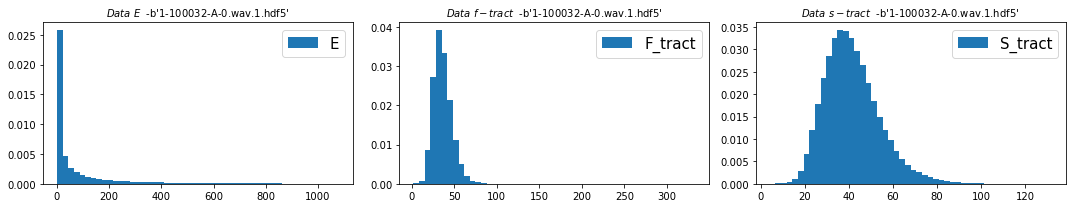

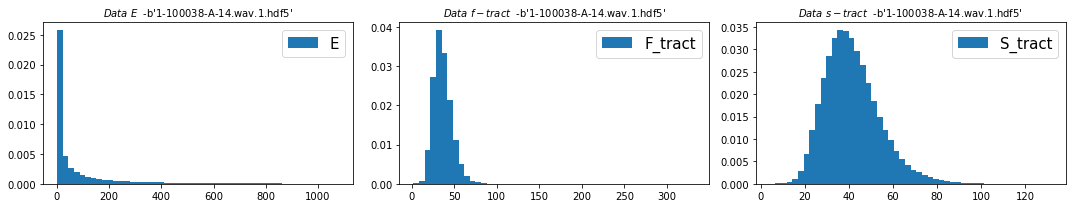

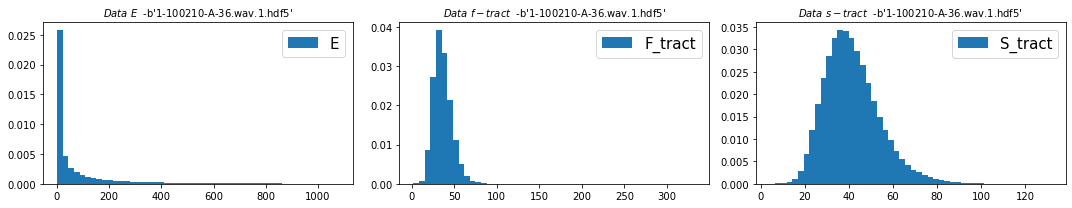

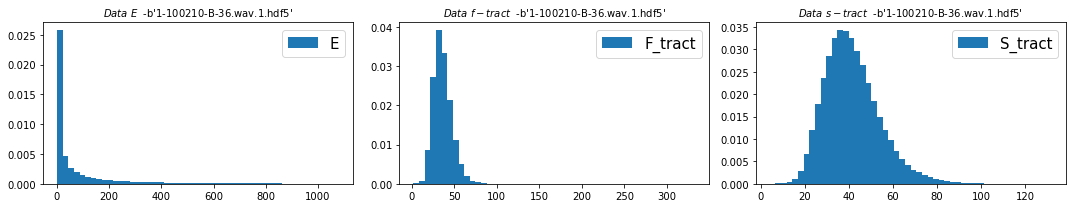

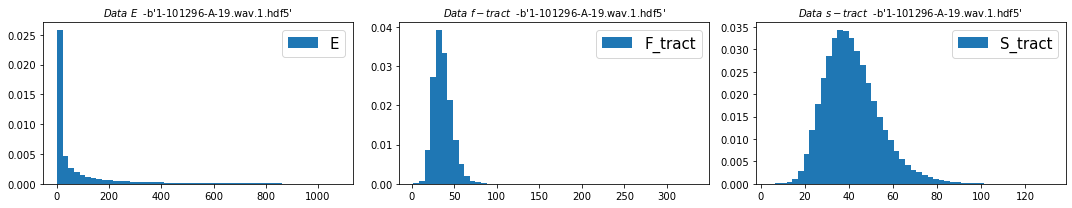

In [16]:
# https://academy.datawrapper.de/article/136-histogram-min-max-median-mean
tractfile = os.fsencode(r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31/')
count = 0 

#call and plot the data

for index in os.listdir(tractfile):
    fpath = os.path.join(tractfile, newfile)
    Tfile = h5py.File(fpath,"r") #open the file for reading
    
    F  = Tfile["f_tract"][6:94,:].flatten()
    S  = Tfile["s_tract"][6:94,:].flatten()
    E  = Tfile["E"][:,:].flatten()
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    # ploting histograms
    ax[0].set_title('$Data\ E$  -' + format(index), size=10)
    ax[0].hist(E,bins = 50, range = (0,1080), density=True, label='E')
    ax[0].legend(fontsize=15)

    ax[1].set_title('$Data\ f-tract$  -' + format(index), size=10)
    ax[1].hist(F,bins = 50, range = (2,333),density=True,label='F_tract')
    ax[1].legend(fontsize=15)

    ax[2].set_title('$Data\ s-tract$  -' + format(index), size=10)
    ax[2].hist(S,bins = 50, range = (4,132),density=True,label='S_tract')
    ax[2].legend(fontsize=15)

    plt.tight_layout()
    plt.show()
    
    count+=1
    if(count>=5):
        break

# -------------------------------------Feature construction-------------------------------------
1. My next attempt will be to start the feature sets construction.

2. In this instance if i use 4 bins:the 3 features f_tract, s_tract and E: slice the features into 3: 

3. 1200 files  from fold 1,2,3 for the training data; 1200 by 18 matrix frequencies of training data.

4. 400 files from fold 4 for testing data; 400 by 18 matrix

5. 400files from fold 5 for validation data; 400 by 18 matrix.

6. the more bins the better the accuracy i expect to obtain.
---------------------------------------------------------------
Split the folds into training and testing and validation

In [2]:
#https://medium.com/analytics-vidhya/training-your-first-machine-learning-model-with-sklearn-e03d5de3bfba
'''
Construction of the first feature set, with 2 bins
'''
csv = pd.read_csv (r'\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
fold_cat = pd.DataFrame(csv, columns= ['fold','category'])
bins=4
cnt=0
cnt2=0
cnt3=0 

X_train = np.zeros([1200,(bins*9)])#1200 files from folds 1, 2 and 3 (training data)

X_test = np.zeros([400,(bins*9)])#400 files from folds 4  (testing data)

X_validate =np.zeros([400,(bins*9)])

Y_train = np.zeros([1200,1])#this will save indexes that will be consulted later for obtaining the labels (class) of each file.

Y_test = np.zeros([400,1])

Y_validate = np.zeros([400,1])

for index, row in tqdm(fold_cat.iterrows()):
    categories = row['category']
    folds=row['fold']
    if(folds==1 or folds==2 or folds==3): #training data: folds 1,2 and 3
        filenamej = r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31/' + csv.iloc[index]['filename'] + '.1.hdf5'
        ff = h5py.File(filenamej,"r")
        #cut rows of zeros, divide the feature in three parts and flatten
        fT=ff["f_tract"][6:35,:].flatten()
        fT1=ff["f_tract"][35:64,:].flatten()        
        fT2=ff["f_tract"][64:94,:].flatten()
        
        sT=ff["s_tract"][6:35,:].flatten()
        sT1=ff["s_tract"][35:64,:].flatten()
        sT2=ff["s_tract"][64:94,:].flatten()
        
        ET=ff["E"][0:30,:].flatten()
        ET1=ff["E"][30:60,:].flatten()
        ET2=ff["E"][60:100,:].flatten()
        
        #calculate histograms
        frequency_f = histogram1d(fT,range=[20,40], bins=bins) 
        frequency_f1 = histogram1d(fT1,range=[20,40], bins=bins)
        frequency_f2 = histogram1d(fT2,range=[20,40], bins=bins)
        
        frequency_s = histogram1d(sT,range=[25,55], bins=bins)
        frequency_s1 = histogram1d(sT1,range=[25,55], bins=bins)
        frequency_s2 = histogram1d(sT2,range=[25,55], bins=bins)
        
        frequency_E = histogram1d(ET,range=[0,50], bins=bins)
        frequency_E1 = histogram1d(ET1,range=[0,50], bins=bins)
        frequency_E2 = histogram1d(ET2,range=[0,50], bins=bins) 
        
        frequencies_f=np.append(np.append(frequency_f,frequency_f1),frequency_f2)
        
        frequencies_s=np.append(np.append(frequency_s,frequency_s1),frequency_s2)
        
        frequencies_E=np.append(np.append(frequency_E,frequency_E1),frequency_E2)
        
        X_train[cnt]=np.append(np.append(frequencies_f,frequencies_s),frequencies_E,axis=0)
        Y_train[cnt]=index
        cnt+=1
        
    elif(folds==4): #testing data: folds 4 
        filenamej = r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31/' + csv.iloc[index]['filename'] + '.1.hdf5'
        ff = h5py.File(filenamej,"r")
        #cut rows of zeros, divide the feature in three parts and flatten
        fT=ff["f_tract"][6:35,:].flatten()
        fT1=ff["f_tract"][35:64,:].flatten()
        fT2=ff["f_tract"][64:94,:].flatten()
        sT=ff["s_tract"][6:35,:].flatten()
        sT1=ff["s_tract"][35:64,:].flatten()
        sT2=ff["s_tract"][64:94,:].flatten()
        ET=ff["E"][0:30,:].flatten()
        ET1=ff["E"][30:60,:].flatten()
        ET2=ff["E"][60:100,:].flatten()
        #calculate histograms
        frequency_f = histogram1d(fT,range=[20,40], bins=bins)
        frequency_f1 = histogram1d(fT1,range=[20,40], bins=bins)
        frequency_f2 = histogram1d(fT2,range=[20,40], bins=bins)
        
        frequency_s = histogram1d(sT,range=[25,55], bins=bins)
        frequency_s1 = histogram1d(sT1,range=[25,55], bins=bins)
        frequency_s2 = histogram1d(sT2,range=[25,55], bins=bins)
        
        frequency_E = histogram1d(ET,range=[0,50], bins=bins)
        frequency_E1 = histogram1d(ET1,range=[0,50], bins=bins)
        frequency_E2 = histogram1d(ET2,range=[0,50], bins=bins)
        frequencies_f=np.append(np.append(frequency_f,frequency_f1),frequency_f2)
        
        frequencies_s=np.append(np.append(frequency_s,frequency_s1),frequency_s2)
        
        frequencies_E=np.append(np.append(frequency_E,frequency_E1),frequency_E2)
        
        X_test[cnt2]=np.append(np.append(frequencies_f,frequencies_s),frequencies_E,axis=0)
        Y_test[cnt2]=index
        cnt2+=1
        
    elif(folds==5): #validation data: folds and 5 
        filenamej = r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31/' + csv.iloc[index]['filename'] + '.1.hdf5'
        ff = h5py.File(filenamej,"r")
        
        #cut rows of zeros, divide the feature in three parts and flatten
        fT=ff["f_tract"][6:35,:].flatten()
        fT1=ff["f_tract"][35:64,:].flatten()
        fT2=ff["f_tract"][64:94,:].flatten()
        
        sT=ff["s_tract"][6:35,:].flatten()
        sT1=ff["s_tract"][35:64,:].flatten()
        sT2=ff["s_tract"][64:94,:].flatten()
        
        ET=ff["E"][0:30,:].flatten()
        ET1=ff["E"][30:60,:].flatten()
        ET2=ff["E"][60:100,:].flatten()
        #calculate histograms
        frequency_f = histogram1d(fT,range=[20,40], bins=bins)
        frequency_f1 = histogram1d(fT1,range=[20,40], bins=bins)
        frequency_f2 = histogram1d(fT2,range=[20,40], bins=bins)
        
        frequency_s = histogram1d(sT,range=[25,55], bins=bins)
        frequency_s1 = histogram1d(sT1,range=[25,55], bins=bins)
        frequency_s2 = histogram1d(sT2,range=[25,55], bins=bins)
        
        frequency_E = histogram1d(ET,range=[0,50], bins=bins)
        frequency_E1 = histogram1d(ET1,range=[0,50], bins=bins)
        frequency_E2 = histogram1d(ET2,range=[0,50], bins=bins)
        
        frequencies_f=np.append(np.append(frequency_f,frequency_f1),frequency_f2)
        
        frequencies_s=np.append(np.append(frequency_s,frequency_s1),frequency_s2)
        
        frequencies_E=np.append(np.append(frequency_E,frequency_E1),frequency_E2)
        
        X_validate[cnt3]=np.append(np.append(frequencies_f,frequencies_s),frequencies_E,axis=0)
        Y_validate[cnt3]=index
        cnt3+=1

2000it [05:10,  6.43it/s]


In [3]:
#save the train and test data in h5py files
X_train_bins4 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_train_bins4.hdf5', mode = 'w')
X_train_bins4.create_dataset('X_train_bins4', data=X_train)
X_train_bins4.close()

Y_train_bins4 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_train_bins4.hdf5', mode = 'w')
Y_train_bins4.create_dataset('Y_train_bins4', data=Y_train)
Y_train_bins4.close()

X_test_bins4 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_test_bins4.hdf5', mode = 'w')
X_test_bins4.create_dataset('X_test_bins4', data=X_test)
X_test_bins4.close()

Y_test_bins4 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_test_bins4.hdf5', mode = 'w')
Y_test_bins4.create_dataset('Y_test_bins4', data=Y_test)
Y_test_bins4.close()

X_validate_bins4 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_validate_bins4.hdf5', mode = 'w')
X_validate_bins4.create_dataset('X_validate_bins4', data=X_test)
X_validate_bins4.close()

Y_validate_bins4 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_validate_bins4.hdf5', mode = 'w')
Y_validate_bins4.create_dataset('Y_validate_bins4', data=Y_test)
Y_validate_bins4.close()

In [4]:
#opens the Y_train_bins4 file and converts the array of indexes into an array with labels
Y_train_bins4 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_train_bins4.hdf5', mode = 'r+')
Y_train_bins4 = Y_train_bins4['Y_train_bins4']
Y_train_bins4_np = Y_train_bins4
Y_train_bins4_list=list()

csv = pd.read_csv (r'\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
classes = pd.DataFrame(csv, columns= ['category'])

for index, row in classes.iterrows():
    categories = row['category']
    for i in Y_train_bins4_np:
        if(index==i):
            Y_train_bins4_list.append(categories)
            
Y_train_bins4_labels=np.array(Y_train_bins4_list)

In [5]:
#opens the Y_test_bins4 file and converts the array of indexes into an array with labels
Y_test_bins4 = h5py.File(r'C:\Users\31647/machinelearning/train_test_AEDC/' + 'Y_test_bins4.hdf5', mode = 'r+')
Y_test_bins4 = Y_test_bins4['Y_test_bins4']
Y_test_bins4_np = Y_test_bins4
Y_test_bins4_list=list()

csv = pd.read_csv (r'C:\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
classes = pd.DataFrame(csv, columns= ['category'])

for index, row in classes.iterrows():
    categories = row['category']
    for i in Y_test_bins4_np:
        if(index==i):
            Y_test_bins4_list.append(categories)
    
Y_test_bins4_labels=np.array(Y_test_bins4_list)

In [6]:
#opens the Y_validate_bins4 file and converts the array of indexes into an array with labels
Y_validate_bins4 = h5py.File(r'C:\Users\31647/machinelearning/train_test_AEDC/' + 'Y_validate_bins4.hdf5', mode = 'r+')
Y_validate_bins4 = Y_validate_bins4['Y_validate_bins4']
Y_validate_bins4_np = Y_validate_bins4
Y_validate_bins4_list=list()

csv = pd.read_csv (r'C:\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
classes = pd.DataFrame(csv, columns= ['category'])

for index, row in classes.iterrows():
    categories = row['category']
    for i in Y_validate_bins4_np:
        if(index==i):
            Y_validate_bins4_list.append(categories)
    
Y_validate_bins4_labels=np.array(Y_validate_bins4_list)

In [10]:
#converst the 'X_train_bins4',X_test_bins4'and 'X_test_bins4' h5py files and converts obtains np arrays
X_train_bins4 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_train_bins4.hdf5', mode = 'r+')
X_train_bins4 =X_train_bins4['X_train_bins4']
X_train_bins4 =np.array(X_train_bins4)

X_test_bins4 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_test_bins4.hdf5', mode = 'r+')
X_test_bins4 =X_test_bins4['X_test_bins4']
X_test_bins4 =np.array(X_test_bins4)

X_validate_bins4 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_validate_bins4.hdf5', mode = 'r+')
X_validate_bins4 =X_validate_bins4['X_validate_bins4']
X_validate_bins4 =np.array(X_validate_bins4)

######  Next for bin 6

In [11]:
'''
Construction of the first feature set, with 2 bins
'''
csv = pd.read_csv (r'\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
fold_cat = pd.DataFrame(csv, columns= ['fold','category'])
bins=6
cnt=0
cnt2=0
cnt3=0 

X_train = np.zeros([1200,(bins*9)])#1200 files from folds 1, 2 and 3 (training data)

X_test = np.zeros([400,(bins*9)])#400 files from folds 4 (testing data)

X_validate =np.zeros([400,(bins*9)])

Y_train = np.zeros([1200,1])#this will save indexes that will be consulted later for obtaining the labels (class) of each file. 
Y_test = np.zeros([400,1])

Y_validate = np.zeros([400,1])

for index, row in tqdm(fold_cat.iterrows()):
    categories = row['category']
    folds=row['fold']
    if(folds==1 or folds==2 or folds==3): #training data: folds 1,2 and 3
        filenamej = r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31/' + csv.iloc[index]['filename'] + '.1.hdf5'
        ff = h5py.File(filenamej,"r")
        #cut rows of zeros, divide the feature in three parts and flatten
        fT=ff["f_tract"][6:35,:].flatten()
        fT1=ff["f_tract"][35:64,:].flatten()        
        fT2=ff["f_tract"][64:94,:].flatten()
        
        sT=ff["s_tract"][6:35,:].flatten()
        sT1=ff["s_tract"][35:64,:].flatten()
        sT2=ff["s_tract"][64:94,:].flatten()
        
        ET=ff["E"][0:30,:].flatten()
        ET1=ff["E"][30:60,:].flatten()
        ET2=ff["E"][60:100,:].flatten()
        
        #calculate histograms
        frequency_f = histogram1d(fT,range=[20,40], bins=bins)
        frequency_f1 = histogram1d(fT1,range=[20,40], bins=bins)
        frequency_f2 = histogram1d(fT2,range=[20,40], bins=bins)
        
        frequency_s = histogram1d(sT,range=[25,55], bins=bins)
        frequency_s1 = histogram1d(sT1,range=[25,55], bins=bins)
        frequency_s2 = histogram1d(sT2,range=[25,55], bins=bins)
        
        frequency_E = histogram1d(ET,range=[0,50], bins=bins)
        frequency_E1 = histogram1d(ET1,range=[0,50], bins=bins)
        frequency_E2 = histogram1d(ET2,range=[0,50], bins=bins) 
        
        frequencies_f=np.append(np.append(frequency_f,frequency_f1),frequency_f2)
        
        frequencies_s=np.append(np.append(frequency_s,frequency_s1),frequency_s2)
        
        frequencies_E=np.append(np.append(frequency_E,frequency_E1),frequency_E2)
        
        X_train[cnt]=np.append(np.append(frequencies_f,frequencies_s),frequencies_E,axis=0)
        Y_train[cnt]=index
        cnt+=1
        
    elif(folds==4): #testing data: folds 4 
        filenamej = r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31/' + csv.iloc[index]['filename'] + '.1.hdf5'
        ff = h5py.File(filenamej,"r")
        #cut rows of zeros, divide the feature in three parts and flatten
        fT=ff["f_tract"][6:35,:].flatten()
        fT1=ff["f_tract"][35:64,:].flatten()
        fT2=ff["f_tract"][64:94,:].flatten()
        sT=ff["s_tract"][6:35,:].flatten()
        sT1=ff["s_tract"][35:64,:].flatten()
        sT2=ff["s_tract"][64:94,:].flatten()
        ET=ff["E"][0:30,:].flatten()
        ET1=ff["E"][30:60,:].flatten()
        ET2=ff["E"][60:100,:].flatten()
        #calculate histograms
        frequency_f = histogram1d(fT,range=[20,40], bins=bins)
        frequency_f1 = histogram1d(fT1,range=[20,40], bins=bins)
        frequency_f2 = histogram1d(fT2,range=[20,40], bins=bins)
        
        frequency_s = histogram1d(sT,range=[25,55], bins=bins)
        frequency_s1 = histogram1d(sT1,range=[25,55], bins=bins)
        frequency_s2 = histogram1d(sT2,range=[25,55], bins=bins)
        
        frequency_E = histogram1d(ET,range=[0,50], bins=bins)
        frequency_E1 = histogram1d(ET1,range=[0,50], bins=bins)
        frequency_E2 = histogram1d(ET2,range=[0,50], bins=bins)
        frequencies_f=np.append(np.append(frequency_f,frequency_f1),frequency_f2)
        
        frequencies_s=np.append(np.append(frequency_s,frequency_s1),frequency_s2)
        
        frequencies_E=np.append(np.append(frequency_E,frequency_E1),frequency_E2)
        
        X_test[cnt2]=np.append(np.append(frequencies_f,frequencies_s),frequencies_E,axis=0)
        Y_test[cnt2]=index
        cnt2+=1
        
    elif(folds==5): #validation data: folds and 5 
        filenamej = r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31/' + csv.iloc[index]['filename'] + '.1.hdf5'
        ff = h5py.File(filenamej,"r")
        
        #cut rows of zeros, divide the feature in three parts and flatten
        fT=ff["f_tract"][6:35,:].flatten()
        fT1=ff["f_tract"][35:64,:].flatten()
        fT2=ff["f_tract"][64:94,:].flatten()
        
        sT=ff["s_tract"][6:35,:].flatten()
        sT1=ff["s_tract"][35:64,:].flatten()
        sT2=ff["s_tract"][64:94,:].flatten()
        
        ET=ff["E"][0:30,:].flatten()
        ET1=ff["E"][30:60,:].flatten()
        ET2=ff["E"][60:100,:].flatten()
        #calculate histograms
        frequency_f = histogram1d(fT,range=[20,40], bins=bins)
        frequency_f1 = histogram1d(fT1,range=[20,40], bins=bins)
        frequency_f2 = histogram1d(fT2,range=[20,40], bins=bins)
        
        frequency_s = histogram1d(sT,range=[25,55], bins=bins)
        frequency_s1 = histogram1d(sT1,range=[25,55], bins=bins)
        frequency_s2 = histogram1d(sT2,range=[25,55], bins=bins)
        
        frequency_E = histogram1d(ET,range=[0,50], bins=bins)
        frequency_E1 = histogram1d(ET1,range=[0,50], bins=bins)
        frequency_E2 = histogram1d(ET2,range=[0,50], bins=bins)
        
        frequencies_f=np.append(np.append(frequency_f,frequency_f1),frequency_f2)
        
        frequencies_s=np.append(np.append(frequency_s,frequency_s1),frequency_s2)
        
        frequencies_E=np.append(np.append(frequency_E,frequency_E1),frequency_E2)
        
        X_validate[cnt3]=np.append(np.append(frequencies_f,frequencies_s),frequencies_E,axis=0)
        Y_validate[cnt3]=index
        cnt3+=1

2000it [05:10,  6.44it/s]


In [15]:
#save the train and test data in h5py files
X_train_bins6 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_train_bins6.hdf5', mode = 'w')
X_train_bins6.create_dataset('X_train_bins6', data=X_train)
X_train_bins6.close()

Y_train_bins6 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_train_bins6.hdf5', mode = 'w')
Y_train_bins6.create_dataset('Y_train_bins6', data=Y_train)
Y_train_bins6.close()

X_test_bins6 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_test_bins6.hdf5', mode = 'w')
X_test_bins6.create_dataset('X_test_bins6', data=X_test)
X_test_bins6.close()

Y_test_bins6 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_test_bins6.hdf5', mode = 'w')
Y_test_bins6.create_dataset('Y_test_bins6', data=Y_test)
Y_test_bins6.close()

X_validate_bins6 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_validate_bins6.hdf5', mode = 'w')
X_validate_bins6.create_dataset('X_validate_bins6', data=X_test)
X_validate_bins6.close()

Y_validate_bins6 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_validate_bins6.hdf5', mode = 'w')
Y_validate_bins6.create_dataset('Y_validate_bins6', data=Y_test)
Y_validate_bins6.close()

In [16]:
#opens the Y_train_bins6 file and converts the array of indexes into an array with labels
Y_train_bins6 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_train_bins6.hdf5', mode = 'r+')
Y_train_bins6 = Y_train_bins6['Y_train_bins6']
Y_train_bins6_np = Y_train_bins6
Y_train_bins6_list=list()

csv = pd.read_csv (r'\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
classes = pd.DataFrame(csv, columns= ['category'])

for index, row in classes.iterrows():
    categories = row['category']
    for i in Y_train_bins6_np:
        if(index==i):
            Y_train_bins6_list.append(categories)
            
Y_train_bins6_labels=np.array(Y_train_bins6_list)


In [17]:
#opens the Y_test_bins6 file and converts the array of indexes into an array with labels
Y_test_bins6 = h5py.File(r'C:\Users\31647/machinelearning/train_test_AEDC/' + 'Y_test_bins6.hdf5', mode = 'r+')
Y_test_bins6 = Y_test_bins6['Y_test_bins6']
Y_test_bins6_np = Y_test_bins6
Y_test_bins6_list=list()

csv = pd.read_csv (r'C:\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
classes = pd.DataFrame(csv, columns= ['category'])

for index, row in classes.iterrows():
    categories = row['category']
    for i in Y_test_bins6_np:
        if(index==i):
            Y_test_bins6_list.append(categories)
    
Y_test_bins6_labels=np.array(Y_test_bins6_list)

In [18]:
#opens the Y_validate_bins6 file and converts the array of indexes into an array with labels
Y_validate_bins6 = h5py.File(r'C:\Users\31647/machinelearning/train_test_AEDC/' + 'Y_validate_bins6.hdf5', mode = 'r+')
Y_validate_bins6 = Y_validate_bins6['Y_validate_bins6']
Y_validate_bins6_np = Y_validate_bins6
Y_validate_bins6_list=list()

csv = pd.read_csv (r'C:\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
classes = pd.DataFrame(csv, columns= ['category'])

for index, row in classes.iterrows():
    categories = row['category']
    for i in Y_validate_bins6_np:
        if(index==i):
            Y_validate_bins6_list.append(categories)
    
Y_validate_bins6_labels=np.array(Y_validate_bins6_list)

In [19]:
#converst the 'X_train_bins6',X_test_bins6'and 'X_test_bins6' h5py files and converts obtains np arrays
X_train_bins6 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_train_bins6.hdf5', mode = 'r+')
X_train_bins6 =X_train_bins6['X_train_bins6']
X_train_bins6 =np.array(X_train_bins6)

X_test_bins6 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_test_bins6.hdf5', mode = 'r+')
X_test_bins6 =X_test_bins6['X_test_bins6']
X_test_bins6 =np.array(X_test_bins6)

X_validate_bins6 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_validate_bins6.hdf5', mode = 'r+')
X_validate_bins6 =X_validate_bins6['X_validate_bins6']
X_validate_bins6 =np.array(X_validate_bins6)

Next for 10 bins

In [40]:
'''
Construction of the first feature set, with 2 bins
'''
csv = pd.read_csv (r'\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
fold_cat = pd.DataFrame(csv, columns= ['fold','category'])
bins=10
cnt=0
cnt2=0
cnt3=0 

X_train = np.zeros([1200,(bins*9)])#1200 files from folds 1, 2 and 3 (training data)

X_test = np.zeros([400,(bins*9)])#400 files from folds 4 (testing data)

X_validate =np.zeros([400,(bins*9)])

Y_train = np.zeros([1200,1])#this will save indexes that will be consulted later for obtaining the labels (class) of each file. 

Y_test = np.zeros([400,1])

Y_validate = np.zeros([400,1])

for index, row in tqdm(fold_cat.iterrows()):
    categories = row['category']
    folds=row['fold']
    if(folds==1 or folds==2 or folds==3): #training data: folds 1,2 and 3
        filenamej = r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31/' + csv.iloc[index]['filename'] + '.1.hdf5'
        ff = h5py.File(filenamej,"r")
        #cut rows of zeros, divide the feature in three parts and flatten
        fT=ff["f_tract"][6:35,:].flatten()
        fT1=ff["f_tract"][35:64,:].flatten()        
        fT2=ff["f_tract"][64:94,:].flatten()
        
        sT=ff["s_tract"][6:35,:].flatten()
        sT1=ff["s_tract"][35:64,:].flatten()
        sT2=ff["s_tract"][64:94,:].flatten()
        
        ET=ff["E"][0:30,:].flatten()
        ET1=ff["E"][30:60,:].flatten()
        ET2=ff["E"][60:100,:].flatten()
        
        #calculate histograms
        frequency_f = histogram1d(fT,range=[20,40], bins=bins)
        frequency_f1 = histogram1d(fT1,range=[20,40], bins=bins)
        frequency_f2 = histogram1d(fT2,range=[20,40], bins=bins)
        
        frequency_s = histogram1d(sT,range=[25,55], bins=bins)
        frequency_s1 = histogram1d(sT1,range=[25,55], bins=bins)
        frequency_s2 = histogram1d(sT2,range=[25,55], bins=bins)
        
        frequency_E = histogram1d(ET,range=[0,50], bins=bins)
        frequency_E1 = histogram1d(ET1,range=[0,50], bins=bins)
        frequency_E2 = histogram1d(ET2,range=[0,50], bins=bins) 
        
        frequencies_f=np.append(np.append(frequency_f,frequency_f1),frequency_f2)
        
        frequencies_s=np.append(np.append(frequency_s,frequency_s1),frequency_s2)
        
        frequencies_E=np.append(np.append(frequency_E,frequency_E1),frequency_E2)
        
        X_train[cnt]=np.append(np.append(frequencies_f,frequencies_s),frequencies_E,axis=0)#frecuencies from the bins (f_tract, s_tract and E) for the files from folds 1,2 and 3
        Y_train[cnt]=index
        cnt+=1
        
    elif(folds==4): #testing data: folds 4
        filenamej = r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31/' + csv.iloc[index]['filename'] + '.1.hdf5'
        ff = h5py.File(filenamej,"r")
        #cut rows of zeros, divide the feature in three parts and flatten
        fT=ff["f_tract"][6:35,:].flatten()
        fT1=ff["f_tract"][35:64,:].flatten()
        fT2=ff["f_tract"][64:94,:].flatten()
        sT=ff["s_tract"][6:35,:].flatten()
        sT1=ff["s_tract"][35:64,:].flatten()
        sT2=ff["s_tract"][64:94,:].flatten()
        ET=ff["E"][0:30,:].flatten()
        ET1=ff["E"][30:60,:].flatten()
        ET2=ff["E"][60:100,:].flatten()
        #calculate histograms
        frequency_f = histogram1d(fT,range=[20,40], bins=bins)
        frequency_f1 = histogram1d(fT1,range=[20,40], bins=bins)
        frequency_f2 = histogram1d(fT2,range=[20,40], bins=bins)
        
        frequency_s = histogram1d(sT,range=[25,55], bins=bins)
        frequency_s1 = histogram1d(sT1,range=[25,55], bins=bins)
        frequency_s2 = histogram1d(sT2,range=[25,55], bins=bins)
        
        frequency_E = histogram1d(ET,range=[0,50], bins=bins)
        frequency_E1 = histogram1d(ET1,range=[0,50], bins=bins)
        frequency_E2 = histogram1d(ET2,range=[0,50], bins=bins)
        frequencies_f=np.append(np.append(frequency_f,frequency_f1),frequency_f2)
        
        frequencies_s=np.append(np.append(frequency_s,frequency_s1),frequency_s2)
        
        frequencies_E=np.append(np.append(frequency_E,frequency_E1),frequency_E2)
        
        X_test[cnt2]=np.append(np.append(frequencies_f,frequencies_s),frequencies_E,axis=0)
        Y_test[cnt2]=index
        cnt2+=1
        
    elif(folds==5): #validation data: folds and 5 
        filenamej = r'C:\Users\31647\machinelearning\tracts\hdf5\2019-10-31/' + csv.iloc[index]['filename'] + '.1.hdf5'
        ff = h5py.File(filenamej,"r")
        
        #cut rows of zeros, divide the feature in three parts and flatten
        fT=ff["f_tract"][6:35,:].flatten()
        fT1=ff["f_tract"][35:64,:].flatten()
        fT2=ff["f_tract"][64:94,:].flatten()
        
        sT=ff["s_tract"][6:35,:].flatten()
        sT1=ff["s_tract"][35:64,:].flatten()
        sT2=ff["s_tract"][64:94,:].flatten()
        
        ET=ff["E"][0:30,:].flatten()
        ET1=ff["E"][30:60,:].flatten()
        ET2=ff["E"][60:100,:].flatten()
        #calculate histograms
        frequency_f = histogram1d(fT,range=[20,40], bins=bins)
        frequency_f1 = histogram1d(fT1,range=[20,40], bins=bins)
        frequency_f2 = histogram1d(fT2,range=[20,40], bins=bins)
        
        frequency_s = histogram1d(sT,range=[25,55], bins=bins)
        frequency_s1 = histogram1d(sT1,range=[25,55], bins=bins)
        frequency_s2 = histogram1d(sT2,range=[25,55], bins=bins)
        
        frequency_E = histogram1d(ET,range=[0,50], bins=bins)
        frequency_E1 = histogram1d(ET1,range=[0,50], bins=bins)
        frequency_E2 = histogram1d(ET2,range=[0,50], bins=bins)
        
        frequencies_f=np.append(np.append(frequency_f,frequency_f1),frequency_f2)
        
        frequencies_s=np.append(np.append(frequency_s,frequency_s1),frequency_s2)
        
        frequencies_E=np.append(np.append(frequency_E,frequency_E1),frequency_E2)
        
        X_validate[cnt3]=np.append(np.append(frequencies_f,frequencies_s),frequencies_E,axis=0)
        Y_validate[cnt3]=index
        cnt3+=1

2000it [05:25,  6.14it/s]


In [41]:
#save the train and test data in h5py files
X_train_bins10 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_train_bins10.hdf5', mode = 'w')
X_train_bins10.create_dataset('X_train_bins10', data=X_train)
X_train_bins10.close()

Y_train_bins10 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_train_bins10.hdf5', mode = 'w')
Y_train_bins10.create_dataset('Y_train_bins10', data=Y_train)
Y_train_bins10.close()

X_test_bins10 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_test_bins10.hdf5', mode = 'w')
X_test_bins10.create_dataset('X_test_bins10', data=X_test)
X_test_bins10.close()

Y_test_bins10 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_test_bins10.hdf5', mode = 'w')
Y_test_bins10.create_dataset('Y_test_bins10', data=Y_test)
Y_test_bins10.close()

X_validate_bins10 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_validate_bins10.hdf5', mode = 'w')
X_validate_bins10.create_dataset('X_validate_bins10', data=X_test)
X_validate_bins10.close()

Y_validate_bins10 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_validate_bins10.hdf5', mode = 'w')
Y_validate_bins10.create_dataset('Y_validate_bins10', data=Y_test)
Y_validate_bins10.close()

In [43]:
#opens the Y_train_bins6 file and converts the array of indexes into an array with labels
Y_train_bins10 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'Y_train_bins10.hdf5', mode = 'r+')
Y_train_bins10 = Y_train_bins10['Y_train_bins10']
Y_train_bins10_np = Y_train_bins10
Y_train_bins10_list=list()

csv = pd.read_csv (r'\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
classes = pd.DataFrame(csv, columns= ['category'])

for index, row in classes.iterrows():
    categories = row['category']
    for i in Y_train_bins10_np:
        if(index==i):
            Y_train_bins10_list.append(categories)
            
Y_train_bins10_labels=np.array(Y_train_bins10_list)

In [45]:
#opens the Y_test_bins6 file and converts the array of indexes into an array with labels
Y_test_bins10 = h5py.File(r'C:\Users\31647/machinelearning/train_test_AEDC/' + 'Y_test_bins10.hdf5', mode = 'r+')
Y_test_bins10 = Y_test_bins10['Y_test_bins10']
Y_test_bins10_np = Y_test_bins10
Y_test_bins10_list=list()

csv = pd.read_csv (r'C:\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
classes = pd.DataFrame(csv, columns= ['category'])

for index, row in classes.iterrows():
    categories = row['category']
    for i in Y_test_bins10_np:
        if(index==i):
            Y_test_bins10_list.append(categories)
    
Y_test_bins10_labels=np.array(Y_test_bins10_list)


In [46]:
#opens the Y_validate_bins6 file and converts the array of indexes into an array with labels
Y_validate_bins10 = h5py.File(r'C:\Users\31647/machinelearning/train_test_AEDC/' + 'Y_validate_bins10.hdf5', mode = 'r+')
Y_validate_bins10 = Y_validate_bins10['Y_validate_bins10']
Y_validate_bins10_np = Y_validate_bins10
Y_validate_bins10_list=list()

csv = pd.read_csv (r'C:\Users\31647\machinelearning\ESC-50-master\meta\esc50.csv')
classes = pd.DataFrame(csv, columns= ['category'])

for index, row in classes.iterrows():
    categories = row['category']
    for i in Y_validate_bins10_np:
        if(index==i):
            Y_validate_bins10_list.append(categories)
    
Y_validate_bins10_labels=np.array(Y_validate_bins10_list)

In [48]:
#converst the 'X_train_bins6',X_test_bins6'and 'X_test_bins6' h5py files and converts obtains np arrays
X_train_bins10 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_train_bins10.hdf5', mode = 'r+')
X_train_bins10 =X_train_bins10['X_train_bins10']
X_train_bins10 =np.array(X_train_bins10)

X_test_bins10 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_test_bins10.hdf5', mode = 'r+')
X_test_bins10 =X_test_bins10['X_test_bins10']
X_test_bins10 =np.array(X_test_bins10)

X_validate_bins10 = h5py.File(r'C:\Users\31647\machinelearning/train_test_AEDC/' + 'X_validate_bins10.hdf5', mode = 'r+')
X_validate_bins10 =X_validate_bins10['X_validate_bins10']
X_validate_bins10 =np.array(X_validate_bins10)

## SVM

##### https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
1. The svm is a classifier to seperate data point using hyperplane with the largest amount of margin.
2. Svm is a supervised algorithm used for both classificarion or regression challanges.

### Feature variation



Next step will be applying a kernel function in svm.
##### https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/
Kernel function is a method used to take data as input and transform into required form of processing data. in other words it changes the traing set of data so the non-linear surface can be transform to a linear equation in a higher number of dimension spaces..
#### Linear kerner is the most basic type and functions best when there are alot of features.
#### Polynomial kernel is less efficient and accurate
#### Gaussian Radial Basis Function (RBF) It helps to make proper separation when there is no prior knowledge of data.
#### The linear and Polynomial kernel are less time consuming and provides less accuracy than the RBF

In [36]:
#SVM implementation using a sk learn tool
svm = SVC(C=1,gamma=(1/18),kernel='linear')
svm.fit(X_train_bins4,Y_train_bins4_labels)
Y_pred = svm.predict(X_test_bins4)
print('bins: '+'4')
print('accuracy score = ' +format(accuracy_score(Y_test_bins4_labels,Y_pred)*100)+'%')


bins: 4
accuracy score = 29.5%


In [37]:
svm = SVC(C=1,gamma=(1/18),kernel='poly')
svm.fit(X_train_bins4,Y_train_bins4_labels)
Y_pred = svm.predict(X_test_bins4)
print('bins: '+'4')
print('accuracy score = ' +format(accuracy_score(Y_test_bins4_labels,Y_pred)*100)+'%')


bins: 4
accuracy score = 29.75%


In [39]:
svm = SVC(C=1,gamma=(1/18),kernel='rbf')
svm.fit(X_train_bins4,Y_train_bins4_labels)
Y_pred = svm.predict(X_test_bins4)
print('bins: '+'4')
print('accuracy score = ' +format(accuracy_score(Y_test_bins4_labels,Y_pred)*100)+'%')


bins: 4
accuracy score = 2.0%


Will be using the Poly kernel based on the above. polynomial kernel takes less time and gives a similar accuracy to linear kernel.

Choosing a polynomial kernel should allow the program to draw a curved line that seperates the data points and takes less time to calculate.

In [34]:
#function for svm implementation
def svm_implementation(x_train,y_train,x_test,y_test,c,gamma):
    svm = SVC(C=c,gamma=gamma,kernel='poly')#I used an 'poly' (polynomial) kernel
    svm.fit(x_train,y_train)
    y_pred = svm.predict(x_test)
    print('| C: '+format(c)+'| Gamma: '+format(gamma))
    print('accuracy score = ' +format(accuracy_score(y_test,y_pred)*100)+'%')
    print('________________________________________________________________')

In [49]:
print('4 bins')
svm_implementation(X_train_bins4,Y_train_bins4_labels,X_test_bins4,Y_test_bins4_labels,1,'auto')
print('6 bins')
svm_implementation(X_train_bins6,Y_train_bins6_labels,X_test_bins6,Y_test_bins6_labels,1,'auto')
print('10 bins')
svm_implementation(X_train_bins10,Y_train_bins10_labels,X_test_bins10,Y_test_bins10_labels,1,'auto')


4 bins
| C: 1| Gamma: auto
accuracy score = 29.75%
________________________________________________________________
6 bins
| C: 1| Gamma: auto
accuracy score = 30.25%
________________________________________________________________
10 bins
| C: 1| Gamma: auto
accuracy score = 30.5%
________________________________________________________________


The result above show the higher the bin number the greater the accuracy although not by alot.

### K-Means

- The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
- The purpose for this is to partition and observe into k clusters where each observation belongs to the cluster that has the nearest mean.
Using the data obtained previously

In [51]:
X_train=np.concatenate((X_train_bins10,X_test_bins10),axis=0)
y_train=np.append(Y_train_bins10_labels,Y_test_bins10_labels)

print(X_train.shape)#2000x54 matrix of features
print(y_train.shape)#2000x1 matrix of labels (the classes) for each file

(1600, 90)
(1600,)


In [61]:
# K means label
n_clusters = 1000 #number of samples

k_means = KMeans(n_clusters=n_clusters, n_init=10).fit(X_train)
labels = k_means.labels_
print('k-means labels ',labels)

k-means labels  [697 402 447 ... 409 409 190]


In [56]:
#https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe
#creating dataframe with the class and kmeans
OriginalClass=pd.DataFrame(y_train,columns=['Original_Class'])
klabel=pd.DataFrame(labels,columns=['k_label'])
OriginalClass_klabel=pd.concat((OriginalClass,klabel),axis=1)


In [57]:
# Result of the predicted values in dataframe.
mode_k=list()
for i in range(n_clusters):
    mode_k.append(OriginalClass_klabel[OriginalClass_klabel.k_label==i].Original_Class.mode()[0])
predicted=list()
for index,row in OriginalClass_klabel.iterrows():
    k_val=row['k_label']
    predicted.append(mode_k[k_val])
predicted_df=pd.DataFrame(predicted, columns=['Predicted_class'])
OriginalClass_klabel_pred=pd.concat((OriginalClass_klabel,predicted_df),axis=1)
OriginalClass_klabel_pred

Original_Class  k_label  Predicted_class
0                dog      853              dog
1     chirping_birds      271   chirping_birds
2     vacuum_cleaner       11  keyboard_typing
3     vacuum_cleaner      386       helicopter
4       thunderstorm      115            train
...              ...      ...              ...
1595            frog      641             frog
1596            frog      704             frog
1597            frog      829             frog
1598            frog      370             frog
1599            frog      704             frog

[1600 rows x 3 columns]

In [62]:
cluster_centers=k_means.cluster_centers_
cluster_centers.shape

(1000, 90)

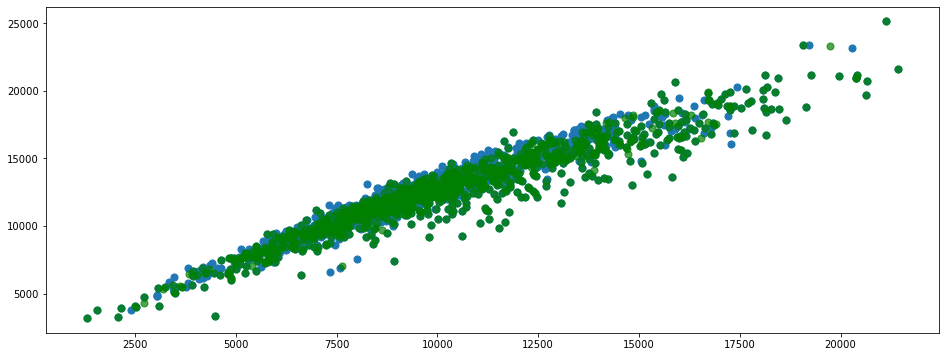

In [69]:
plt.figure(figsize=(16, 6))
plt.scatter(X_train[ : , 0], X_train[ : , 1],  s=50, cmap='summer')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='g', s=50, alpha=0.7)

## Confusion matrix
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

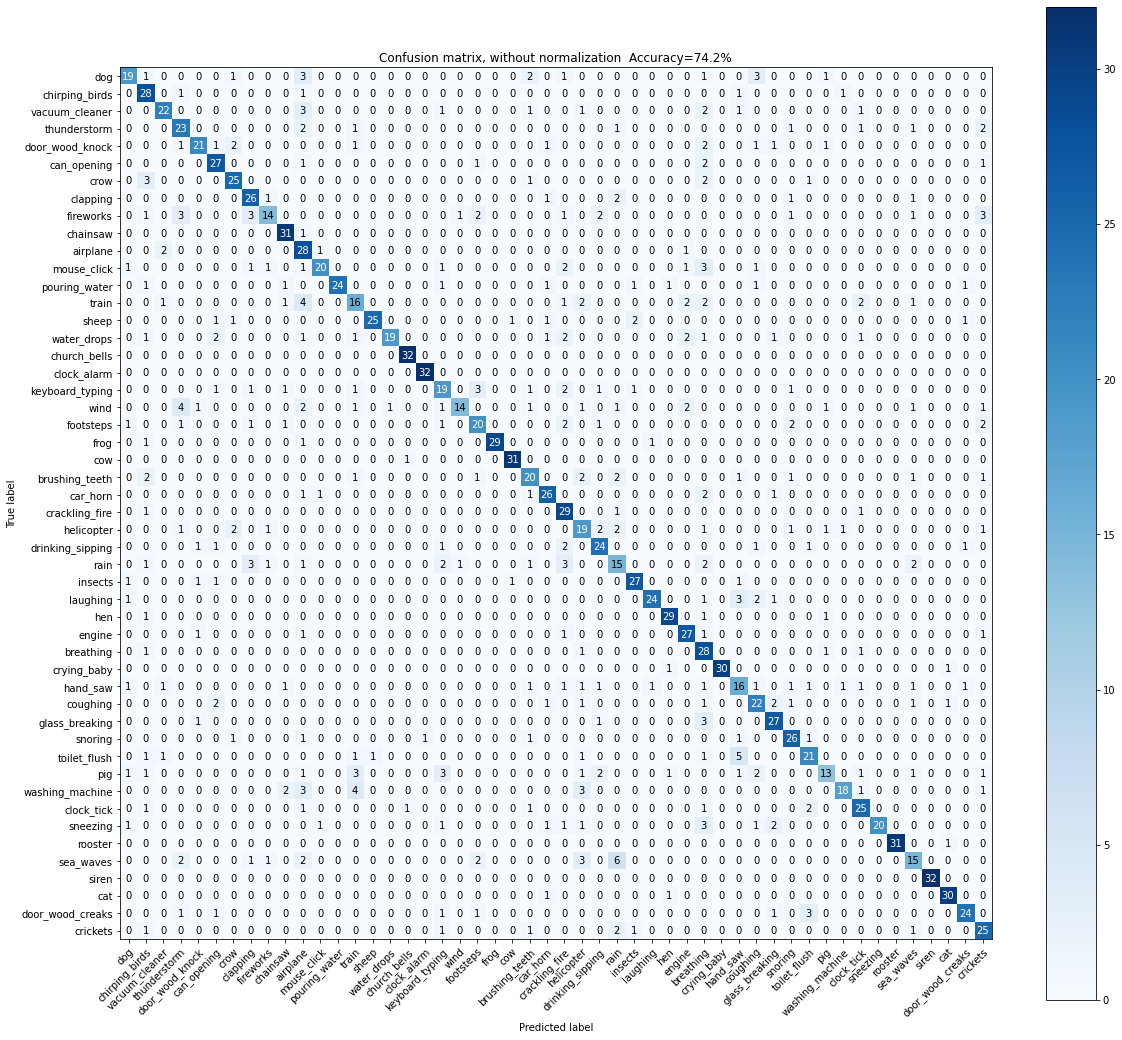

In [78]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
#List with the 50 categories
sorts =list() #categories
sort_list=list()

for index, row in OriginalClass_klabel_pred.iterrows():
    Original_Class=row['Original_Class']
    sorts.append(Original_Class)
    
    for i in sorts:
          if (i not in sort_list):
            sort_list.append(i)
            
#list of predicted values going inside the confusion matrix
pred_list=list()

for index, row in OriginalClass_klabel_pred.iterrows():
    Predicted_Class=row['Predicted_class']
    for i in range(len(sort_list)):
        if(sort_list[i]==Predicted_Class):
            pred_list.append(i)
            
#list of actual values going inside the confusion matrix

main_list=list() 

for index, row in OriginalClass_klabel_pred.iterrows():
    Original_Category=row['Original_Class']
    for i in range(len(sort_list)):
        if(sort_list[i]==Original_Category):
            main_list.append(i)
            
            
sort_names= np.array(sort_list)#array of categories



def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix  '
        else:
            title = 'Confusion matrix, without normalization  '

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
   
    #using the labels that appear in the data only
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(17,15))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with list entries
           xticklabels=classes, yticklabels=classes,
           title=title+'Accuracy='+np.array2string(100*(np.trace(cm)/np.sum(cm)),precision=1)+'%',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(main_list, pred_list, classes=sort_names)

plt.show()

In [80]:
def accuracy(n_clusters):
    k_means = KMeans(n_clusters=n_clusters, n_init=10).fit(X_train)
    labels=k_means.labels_

    #I create a Data Frame with the original class and k label values

    OriginalClass=pd.DataFrame(y_train,columns=['Original_Class'])
    klabel=pd.DataFrame(labels,columns=['k_label'])
    OriginalClass_klabel=pd.concat((OriginalClass,klabel),axis=1)

    #I create a new column in the Data Frame with the predicted values. For this, I use the 'mayority vote', selecting, for each k_label value the most repeated Original_Class value throughout the data frame

    mode_k=list()
    for i in range(n_clusters):
        mode_k.append(OriginalClass_klabel[OriginalClass_klabel.k_label==i].Original_Class.mode()[0])
    predicted=list()
    for index,row in OriginalClass_klabel.iterrows():
        k_val=row['k_label']
        predicted.append(mode_k[k_val])
    predicted_df=pd.DataFrame(predicted, columns=['Predicted_class'])
    OriginalClass_klabel_pred=pd.concat((OriginalClass_klabel,predicted_df),axis=1)
    
    cats=list()
    cat_list=list()
    for index, row in OriginalClass_klabel_pred.iterrows():
        Original_Class=row['Original_Class']
        cats.append(Original_Class)
        for i in cats:
              if (i not in cat_list):
                cat_list.append(i)

    #list of predicted values that's going inside the confusion matrix
    pred_list=list()
    for index, row in OriginalClass_klabel_pred.iterrows():
        Predicted_Class=row['Predicted_class']
        for i in range(len(cat_list)):
            if(cat_list[i]==Predicted_Class):
                pred_list.append(i)

    #list of true values that's going inside the confusion matrix
    true_list=list() 
    for index, row in OriginalClass_klabel_pred.iterrows():
        Original_Category=row['Original_Class']
        for i in range(len(cat_list)):
            if(cat_list[i]==Original_Category):
                true_list.append(i)


    cat_names= np.array(cat_list)#array of categories
    
    cm = confusion_matrix(true_list, pred_list)
    print(n_clusters, 'clusters')
    print(np.array2string(100*(np.trace(cm)/np.sum(cm)),precision=1),'% accuracy')

In [83]:
accuracy(200)

200 clusters
34.8 % accuracy


In [82]:
accuracy(600)

600 clusters
56.6 % accuracy


In [84]:
accuracy(1000)

1000 clusters
75.2 % accuracy


In [86]:
accuracy(1600)

1600 clusters
100. % accuracy


Increasing k (n_clusters) will always reduce the amount of error in the resulting clustering

tHE BEST RESULT AS SEEN ABOVE IS 1600 AND THTA IS ALSO HOW FAR I CAN GO.

#### Feature variation
#### The following function gives the resulting accuracy for a certain feature set


In [90]:
def Feature_variation_accuracy(X_train,Y_train,X_test,Y_test):
    X_train=np.concatenate((X_train,X_test),axis=0)
    y_train=np.append(Y_train,Y_test)
    k_means = KMeans(n_clusters=n_clusters, n_init=10).fit(X_train)
    labels=k_means.labels_

    #I create a Data Frame with the original class and k label values

    OriginalClass=pd.DataFrame(y_train,columns=['Original_Class'])
    klabel=pd.DataFrame(labels,columns=['k_label'])
    OriginalClass_klabel=pd.concat((OriginalClass,klabel),axis=1)

    #I create a new column in the Data Frame with the predicted values. For this, I use the 'mayority vote', selecting, for each k_label value the most repeated Original_Class value throughout the data frame

    mode_k=list()
    for i in range(n_clusters):
        mode_k.append(OriginalClass_klabel[OriginalClass_klabel.k_label==i].Original_Class.mode()[0])
    predicted=list()
    for index,row in OriginalClass_klabel.iterrows():
        k_val=row['k_label']
        predicted.append(mode_k[k_val])
    predicted_df=pd.DataFrame(predicted, columns=['Predicted_class'])
    OriginalClass_klabel_pred=pd.concat((OriginalClass_klabel,predicted_df),axis=1)
    
    cats=list()
    cat_list=list()
    for index, row in OriginalClass_klabel_pred.iterrows():
        Original_Class=row['Original_Class']
        cats.append(Original_Class)
        for i in cats:
              if (i not in cat_list):
                cat_list.append(i)

    #list of predicted values that's going inside the confusion matrix
    pred_list=list()
    for index, row in OriginalClass_klabel_pred.iterrows():
        Predicted_Class=row['Predicted_class']
        for i in range(len(cat_list)):
            if(cat_list[i]==Predicted_Class):
                pred_list.append(i)

    #list of true values that's going inside the confusion matrix
    true_list=list() 
    for index, row in OriginalClass_klabel_pred.iterrows():
        Original_Category=row['Original_Class']
        for i in range(len(cat_list)):
            if(cat_list[i]==Original_Category):
                true_list.append(i)


    cat_names= np.array(cat_list)#array of categories
    
    cm = confusion_matrix(true_list, pred_list)
    print(n_clusters, 'clusters')
    print(np.array2string(100*(np.trace(cm)/np.sum(cm)),precision=1),'% accuracy')

In [92]:

print('4 bins')
Feature_variation_accuracy(X_train_bins4,Y_train_bins4_labels,X_test_bins4,Y_test_bins4_labels)
print('-----------------------------------------------------------------')
print('6 bins')
Feature_variation_accuracy(X_train_bins6,Y_train_bins6_labels,X_test_bins6,Y_test_bins6_labels)
print('-----------------------------------------------------------------')

print('10 bins')
Feature_variation_accuracy(X_train_bins10,Y_train_bins10_labels,X_test_bins10,Y_test_bins10_labels)

4 bins
1000 clusters
74.6 % accuracy
-----------------------------------------------------------------
6 bins
1000 clusters
75.2 % accuracy
-----------------------------------------------------------------
10 bins
1000 clusters
75.4 % accuracy


Based on the results K-Means gives a more accurate result that SVM.The svm does not seem to work well for large classes classification.

#### References
1. https://academy.datawrapper.de/article/136-histogram-min-max-median-mean
2. Samer's lessons
3. https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/
4. https://realpython.com/working-with-files-in-python/
5. https://docs.h5py.org/en/2.3/high/file.html
6. https://stackoverflow.com/questions/28170623/how-to-read-hdf5-files-in-python
7. https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c
8. https://medium.com/analytics-vidhya/training-your-first-machine-learning-model-with-sklearn-e03d5de3bfba
9. https://www.datacamp.com/community/tutorials/histograms-matplotlib